In [2]:
import xarray as xr
import cartopy
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np
from matplotlib.collections import PatchCollection
from dask.distributed import Client, wait
from matplotlib.patches import Polygon
#import cmocean
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from matplotlib.lines import Line2D
import seaborn as sns

In [14]:
def plot_kernels_side_by_side(file_sets, labels, colors, linestyles, titles, xlim=(0, 300), ylim=(0, 1), figsize=(18, 6), dpi=300):
    plt.rcParams.update({
        'font.size': 18,
        'font.family': 'sans-serif',
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 18,
        'ytick.labelsize': 18
    })
    fig, axes = plt.subplots(1, 3, figsize=figsize, sharey=True)
    for ax, files, title in zip(axes, file_sets, titles):
        for file, label, color, linestyle in zip(files, labels, colors, linestyles):
            df = pd.read_csv(file)
            grouped = df.groupby('dist')['obs_per_origin_area']
            median_curve = grouped.median()
            std_curve = grouped.std()
            lower_bound = grouped.quantile(0.025)
            upper_bound = grouped.quantile(0.975)
            # Shaded std dev
            ax.fill_between(
                median_curve.index,
                np.maximum(median_curve.values - std_curve.values, 0),
                median_curve.values + std_curve.values,
                color=color, alpha=0.18, label=None
            )
            # Median as thick solid line
            ax.plot(median_curve.index, median_curve.values, color=color, linewidth=5, alpha=1, linestyle='-', label=label)
            # 95% interval as dashed lines
            ax.plot(lower_bound.index, lower_bound.values, color=color, linestyle=':', linewidth=3, alpha=1)
            ax.plot(upper_bound.index, upper_bound.values, color=color, linestyle=':', linewidth=3, alpha=1)
        ax.set_xlim(*xlim)
        ax.set_ylim(*ylim)
        ax.set_title(title)
        ax.set_xlabel('Distance (km)')
    axes[0].set_ylabel('Cumulative distribution')
    legend_elements = [Line2D([0], [0], color=color, lw=12, label=label) for label, color in zip(labels, colors)]
    axes[0].legend(handles=legend_elements, loc='best')
    plt.tight_layout()
    plt.show()

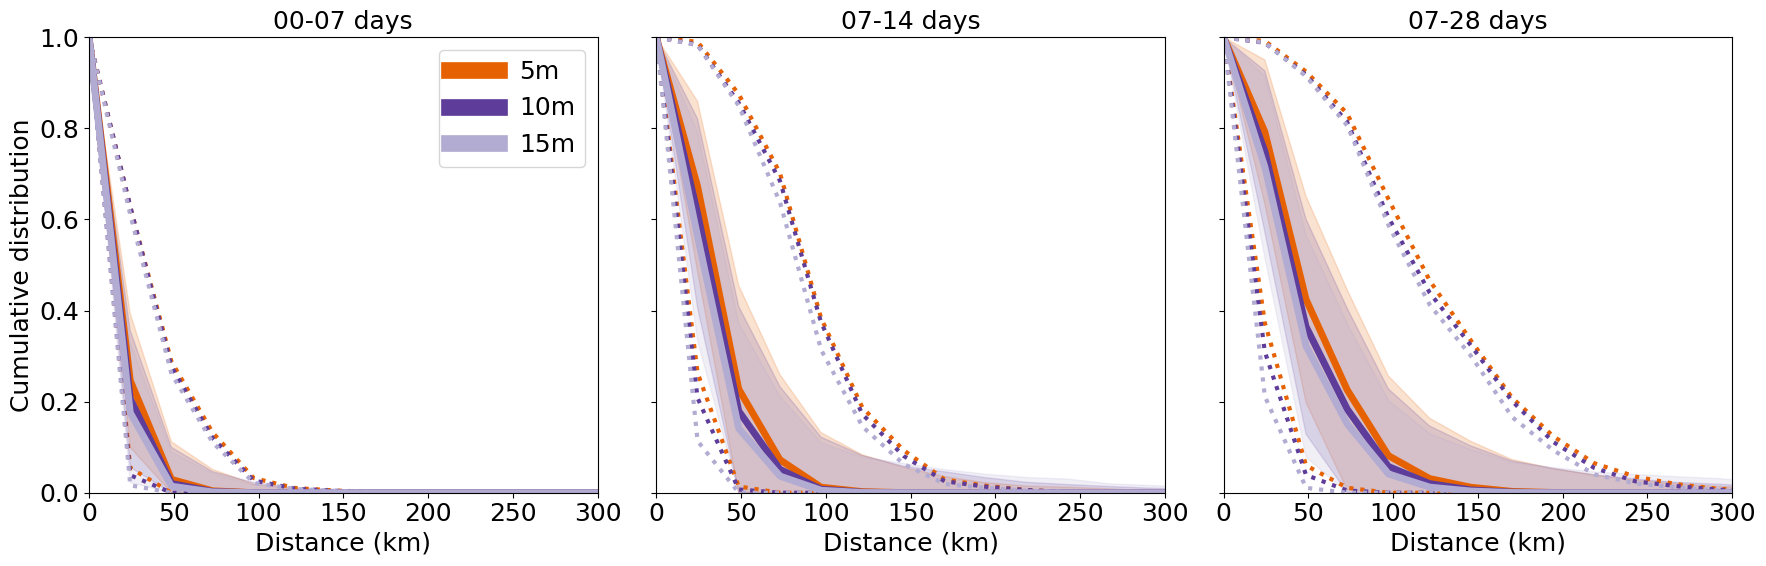

In [15]:
file_sets = [
    [
        "/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_05m/040.2_dist_kernels_05_00-07days.csv",
        "/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_10m/040.2_dist_kernels_05_00-07days.csv",
        "/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_15m/040.2_dist_kernels_05_00-07days.csv"
    ],
    [
        "/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_05m/040.2_dist_kernels_05_07-14days.csv",
        "/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_10m/040.2_dist_kernels_05_07-14days.csv",
        "/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_15m/040.2_dist_kernels_05_07-14days.csv"
    ],
    [
        "/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_05m/040.2_dist_kernels_05_07-28days.csv",
        "/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_10m/040.2_dist_kernels_05_07-28days.csv",
        "/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_15m/040.2_dist_kernels_05_07-28days.csv"
    ]
]
labels = ['5m', '10m', '15m']
colors = [ '#e66101', '#5e3c99', '#b2abd2']
linestyles = ['--', '--', '--']
titles = ['00-07 days', '07-14 days', '07-28 days']

plot_kernels_side_by_side(file_sets, labels, colors, linestyles, titles)

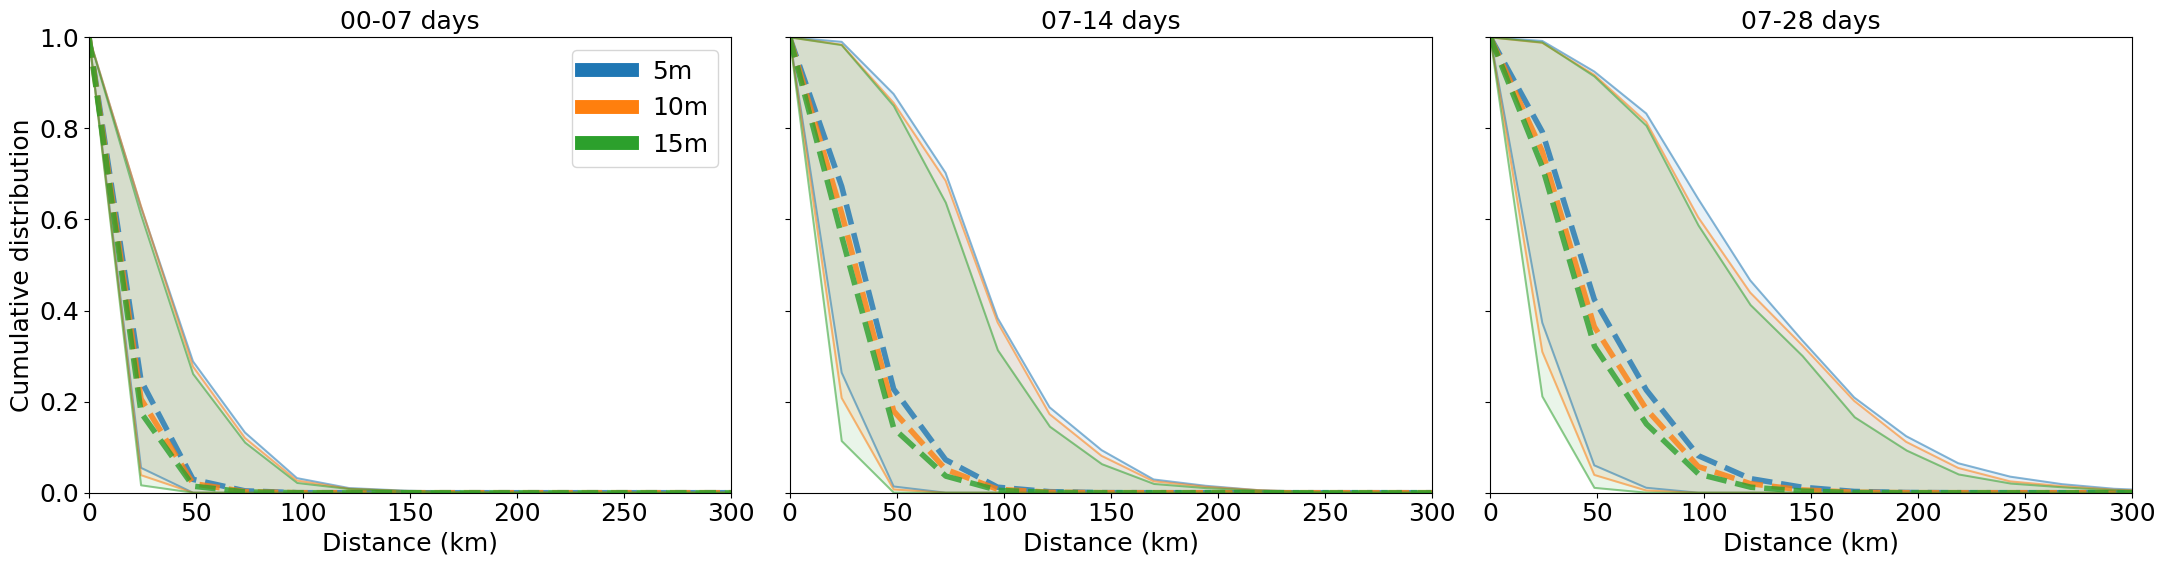

In [30]:
def plot_kernels_side_by_side(file_sets, labels, colors, linestyles, titles, xlim=(0, 300), ylim=(0, 1), figsize=(22, 6), dpi=300):
    plt.rcParams.update({
        'font.size': 18,
        'font.family': 'sans-serif',
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 18,
        'ytick.labelsize': 18
    })
    fig, axes = plt.subplots(1, 3, figsize=figsize, sharey=True)
    for ax, files, title in zip(axes, file_sets, titles):
        for file, label, color, linestyle in zip(files, labels, colors, linestyles):
            df = pd.read_csv(file)
            median_curve = df.groupby('dist')['obs_per_origin_area'].median()
            lower_bound = df.groupby('dist')['obs_per_origin_area'].quantile(0.025)
            upper_bound = df.groupby('dist')['obs_per_origin_area'].quantile(0.975)
            ax.plot(median_curve.index, median_curve.values, color=color, linewidth=4, alpha=0.8, linestyle=linestyle, label=label)
            ax.fill_between(median_curve.index, lower_bound, upper_bound, color=color, alpha=0.1)
            ax.plot(lower_bound.index, lower_bound.values, color=color, linestyle='-', linewidth=1.5, alpha=0.5)
            ax.plot(upper_bound.index, upper_bound.values, color=color, linestyle='-', linewidth=1.5, alpha=0.5)
        ax.set_xlim(*xlim)
        ax.set_ylim(*ylim)
        ax.set_title(title)
        ax.set_xlabel('Distance (km)')
    axes[0].set_ylabel('Cumulative distribution')
    legend_elements = [Line2D([0], [0], color=color, lw=10, label=label) for label, color in zip(labels, colors)]
    axes[0].legend(handles=legend_elements, loc='best')
    plt.tight_layout()
    plt.show()

# File paths for each time window (5m, 10m, 15m)
file_sets = [
    [
        "/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_05m/040.2_dist_kernels_05_00-07days.csv",
        "/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_10m/040.2_dist_kernels_05_00-07days.csv",
        "/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_15m/040.2_dist_kernels_05_00-07days.csv"
    ],
    [
        "/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_05m/040.2_dist_kernels_05_07-14days.csv",
        "/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_10m/040.2_dist_kernels_05_07-14days.csv",
        "/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_15m/040.2_dist_kernels_05_07-14days.csv"
    ],
    [
        "/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_05m/040.2_dist_kernels_05_07-28days.csv",
        "/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_10m/040.2_dist_kernels_05_07-28days.csv",
        "/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_15m/040.2_dist_kernels_05_07-28days.csv"
    ]
]
labels = ['5m', '10m', '15m']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
linestyles = ['--', '--', '--']
titles = ['00-07 days', '07-14 days', '07-28 days']

plot_kernels_side_by_side(file_sets, labels, colors, linestyles, titles)

### Plot dispersal kernels 00-07 at different depths

In [2]:
dist_kernels_5 = pd.read_csv("/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_05m/040.2_dist_kernels_05_00-07days.csv")

In [3]:
dist_kernels_5

,hex0,dist,lon_hex0,lat_hex0,hex_label,obs_per_origin_area
0,"(-1, -19, 20)",0.000000,-3.215782,51.464504,"(-1, -19, 20)",1.000000
1,"(-1, -19, 20)",24.296105,-3.215782,51.464504,"(-1, -19, 20)",0.067708
2,"(-1, -19, 20)",48.592209,-3.215782,51.464504,"(-1, -19, 20)",0.000000
3,"(-1, -19, 20)",72.888314,-3.215782,51.464504,"(-1, -19, 20)",0.000000
4,"(-1, -19, 20)",97.184419,-3.215782,51.464504,"(-1, -19, 20)",0.000000
...,...,...,...,...,...,...
836395,"(9, 9, -18)",2308.129943,-0.803232,56.581335,"(9, 9, -18)",0.000000
836396,"(9, 9, -18)",2332.426048,-0.803232,56.581335,"(9, 9, -18)",0.000000
836397,"(9, 9, -18)",2356.722152,-0.803232,56.581335,"(9, 9, -18)",0.000000
836398,"(9, 9, -18)",2381.018257,-0.803232,56.581335,"(9, 9, -18)",0.000000


In [4]:
dist_kernels_5.where(dist_kernels_5['obs_per_origin_area'] > 0).describe()

,dist,lon_hex0,lat_hex0,obs_per_origin_area
count,14623.000000,14623.000000,14623.000000,1.462300e+04
mean,57.220375,-0.198249,54.580851,2.646880e-01
std,47.478985,4.898291,3.115029,3.824269e-01
min,0.000000,-10.657622,45.921900,9.163148e-07
25%,24.296105,-4.373390,52.401732,2.582651e-03
50%,48.592209,0.084483,54.970517,3.751333e-02
75%,72.888314,3.802188,56.899895,3.385956e-01
max,291.553256,9.898574,62.783837,1.000000e+00


In [5]:
dist_kernels_10 = pd.read_csv("/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_10m/040.2_dist_kernels_05_00-07days.csv")

In [6]:
dist_kernels_10.where(dist_kernels_10['obs_per_origin_area'] > 0).describe()

,dist,lon_hex0,lat_hex0,obs_per_origin_area
count,13613.000000,13613.000000,13613.000000,1.361300e+04
mean,54.797862,-0.195540,54.680800,2.672515e-01
std,46.607430,4.907224,3.122678,3.887141e-01
min,0.000000,-10.657622,45.921900,8.996948e-07
25%,24.296105,-4.399628,52.544287,2.509860e-03
50%,48.592209,0.148796,55.099832,3.735319e-02
75%,72.888314,3.811240,56.998366,3.382587e-01
max,315.849361,10.125259,62.783837,1.000000e+00


In [7]:
dist_kernels_15 = pd.read_csv("/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_15m/040.2_dist_kernels_05_00-07days.csv")

In [8]:
dist_kernels_15.where(dist_kernels_15['obs_per_origin_area'] > 0).describe()

,dist,lon_hex0,lat_hex0,obs_per_origin_area
count,12681.000000,12681.000000,12681.000000,1.268100e+04
mean,53.333085,-0.199824,54.773136,2.707347e-01
std,46.441357,4.924122,3.120748,3.946421e-01
min,0.000000,-10.657622,45.921900,8.892493e-07
25%,24.331445,-4.542203,52.711824,2.359323e-03
50%,48.662890,0.179220,55.233645,3.828285e-02
75%,72.994335,3.837637,57.055852,3.541667e-01
max,267.645896,9.898574,62.764690,1.000000e+00


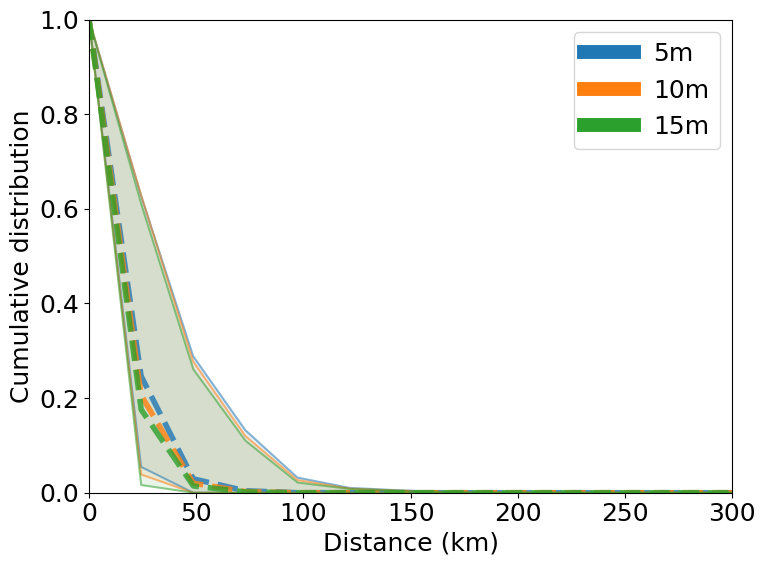

In [9]:
# List of datasets and colors for easier plotting
datasets = [dist_kernels_5, dist_kernels_10, dist_kernels_15]
labels = ['5m', '10m', '15m']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Adjust colors as needed 
linestyles = ['--', '--', '--'] 

plt.rcParams.update({
    'font.size': 18,       # Font size for text
    'font.family': 'sans-serif',  # Font family for consistency
    'axes.titlesize': 18,   # Font size for titles
    'axes.labelsize': 18,   # Font size for axis labels
    'xtick.labelsize': 18,  # Font size for tick labels
    'ytick.labelsize': 18   # Font size for tick labels
})

fig, ax = plt.subplots(figsize=(8, 6))

for dataset, label, color, linestyle in zip(datasets, labels, colors, linestyles):
    median_curve = dataset.groupby('dist')['obs_per_origin_area'].median()
    lower_bound = dataset.groupby('dist')['obs_per_origin_area'].quantile(0.025)
    upper_bound = dataset.groupby('dist')['obs_per_origin_area'].quantile(0.975)
    
    # Main median curve with unique linestyle
    ax.plot(
        median_curve.index, median_curve.values,
        color=color, linewidth=4, alpha=0.8, linestyle=linestyle, label=label
    )
    # Shaded 95% interval
    ax.fill_between(
        median_curve.index, lower_bound, upper_bound,
        color=color, alpha=0.1
    )
    # 95% interval bounds as solid lines
    ax.plot(
        lower_bound.index, lower_bound.values,
        color=color, linestyle='-', linewidth=1.5, alpha=0.5
    )
    ax.plot(
        upper_bound.index, upper_bound.values,
        color=color, linestyle='-', linewidth=1.5, alpha=0.5
    )

# Set axis limits
ax.set_xlim(0, 300)
ax.set_ylim(0, 1)

# Add labels and legend
ax.set_ylabel('Cumulative distribution', fontsize=18)
ax.set_xlabel('Distance (km)', fontsize=18)
legend_elements = [Line2D([0], [0], color=color, lw=10, label=label) for label, color in zip(labels, colors)]
ax.legend(handles=legend_elements, loc='best')

# Save the figure
plt.tight_layout()
#fig.savefig("plots/dispersal_kernels_95percent_00-07days.pdf", dpi=300, bbox_inches='tight')
plt.show()


### Plot dispersal kernels 07-14 at different depths

In [10]:
dist_kernels_5 = pd.read_csv("/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_05m/040.2_dist_kernels_05_07-14days.csv")

In [11]:
dist_kernels_5.where(dist_kernels_5['obs_per_origin_area'] > 0).describe()

,dist,lon_hex0,lat_hex0,obs_per_origin_area
count,20785.000000,20785.000000,20785.000000,2.078500e+04
mean,86.261984,-0.246256,54.579448,3.029885e-01
std,66.980365,4.938805,3.063507,3.769371e-01
min,0.000000,-10.657622,45.921900,9.176063e-07
25%,24.296105,-4.474985,52.481199,4.745636e-03
50%,72.888314,-0.029199,54.934490,7.709822e-02
75%,121.480523,3.859773,56.870129,6.054699e-01
max,413.033779,9.898574,62.783837,1.000000e+00


In [12]:
dist_kernels_10 = pd.read_csv("/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_10m/040.2_dist_kernels_05_07-14days.csv")

In [13]:
dist_kernels_10.where(dist_kernels_10['obs_per_origin_area'] > 0).describe()

,dist,lon_hex0,lat_hex0,obs_per_origin_area
count,19231.000000,19231.000000,19231.000000,1.923100e+04
mean,82.538028,-0.248820,54.704105,3.010873e-01
std,65.867466,4.952349,3.079819,3.777846e-01
min,0.000000,-10.657622,45.921900,9.143844e-07
25%,24.296105,-4.553216,52.666533,4.942024e-03
50%,72.888314,0.013848,55.078250,7.224949e-02
75%,121.480523,3.898930,57.010648,5.867000e-01
max,437.329884,9.953316,62.783837,1.000000e+00


In [14]:
dist_kernels_15 = pd.read_csv("/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_15m/040.2_dist_kernels_05_07-14days.csv")

In [15]:
dist_kernels_15.where(dist_kernels_15['obs_per_origin_area'] > 0).describe()

,dist,lon_hex0,lat_hex0,obs_per_origin_area
count,17777.000000,17777.000000,17777.000000,1.777700e+04
mean,80.390810,-0.236487,54.789314,3.012689e-01
std,66.074077,4.983591,3.082226,3.800796e-01
min,0.000000,-10.657622,45.921900,9.039107e-07
25%,24.331445,-4.611258,52.817734,5.068279e-03
50%,72.994335,0.128183,55.220104,6.856085e-02
75%,121.657225,3.984186,57.083855,5.734870e-01
max,462.297456,9.898574,62.764690,1.000000e+00


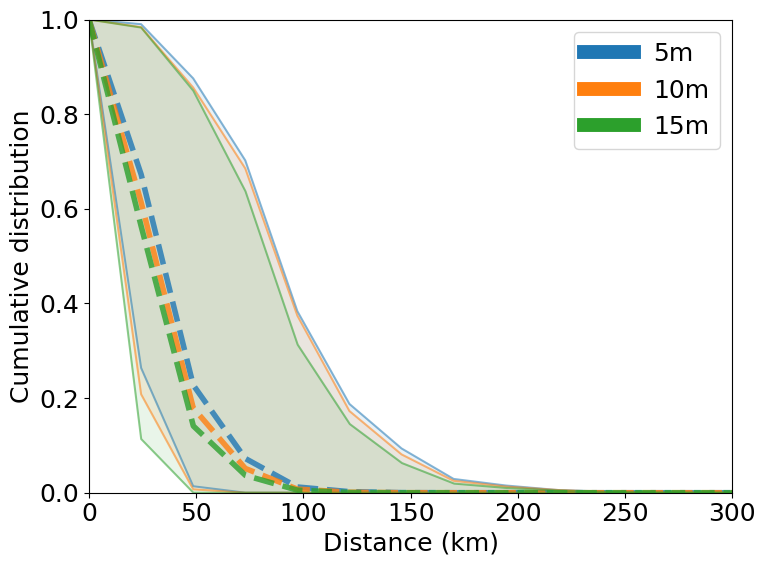

In [16]:
# List of datasets and colors for easier plotting
datasets = [dist_kernels_5, dist_kernels_10, dist_kernels_15]
labels = ['5m', '10m', '15m']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Adjust colors as needed 
linestyles = ['--', '--', '--'] 

plt.rcParams.update({
    'font.size': 18,       # Font size for text
    'font.family': 'sans-serif',  # Font family for consistency
    'axes.titlesize': 18,   # Font size for titles
    'axes.labelsize': 18,   # Font size for axis labels
    'xtick.labelsize': 18,  # Font size for tick labels
    'ytick.labelsize': 18   # Font size for tick labels
})

fig, ax = plt.subplots(figsize=(8, 6))

for dataset, label, color, linestyle in zip(datasets, labels, colors, linestyles):
    median_curve = dataset.groupby('dist')['obs_per_origin_area'].median()
    lower_bound = dataset.groupby('dist')['obs_per_origin_area'].quantile(0.025)
    upper_bound = dataset.groupby('dist')['obs_per_origin_area'].quantile(0.975)
    
    # Main median curve with unique linestyle
    ax.plot(
        median_curve.index, median_curve.values,
        color=color, linewidth=4, alpha=0.8, linestyle=linestyle, label=label
    )
    # Shaded 95% interval
    ax.fill_between(
        median_curve.index, lower_bound, upper_bound,
        color=color, alpha=0.1
    )
    # 95% interval bounds as solid lines
    ax.plot(
        lower_bound.index, lower_bound.values,
        color=color, linestyle='-', linewidth=1.5, alpha=0.5
    )
    ax.plot(
        upper_bound.index, upper_bound.values,
        color=color, linestyle='-', linewidth=1.5, alpha=0.5
    )

# Set axis limits
ax.set_xlim(0, 300)
ax.set_ylim(0, 1)

# Add labels and legend
ax.set_ylabel('Cumulative distribution', fontsize=18)
ax.set_xlabel('Distance (km)', fontsize=18)
legend_elements = [Line2D([0], [0], color=color, lw=10, label=label) for label, color in zip(labels, colors)]
ax.legend(handles=legend_elements, loc='best')

# Save the figure
plt.tight_layout()
#fig.savefig("plots/dispersal_kernels_95percent_07-14days.pdf", dpi=300, bbox_inches='tight')
plt.show()


### Plot dispersal kernels 14-28 at different depths

In [17]:
dist_kernels_5 = pd.read_csv("/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_05m/040.2_dist_kernels_05_14-28days.csv")

In [18]:
dist_kernels_5.where(dist_kernels_5['obs_per_origin_area'] > 0).describe()

,dist,lon_hex0,lat_hex0,obs_per_origin_area
count,28695.000000,28695.000000,28695.000000,2.869500e+04
mean,123.115504,-0.386108,54.553313,2.825629e-01
std,91.333620,4.993888,3.047958,3.594487e-01
min,0.000000,-10.657622,45.921900,3.452228e-07
25%,48.592209,-4.623499,52.435678,4.725468e-03
50%,121.480523,-0.323419,54.955315,7.302514e-02
75%,170.072733,3.891163,56.822885,5.208640e-01
max,583.106512,9.898574,62.783837,1.000000e+00


In [19]:
dist_kernels_10 = pd.read_csv("/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_10m/040.2_dist_kernels_05_14-28days.csv")

In [20]:
dist_kernels_10.where(dist_kernels_10['obs_per_origin_area'] > 0).describe()

,dist,lon_hex0,lat_hex0,obs_per_origin_area
count,26458.000000,26458.000000,26458.000000,2.645800e+04
mean,117.157216,-0.467140,54.673236,2.805980e-01
std,88.133491,5.000918,3.041573,3.596936e-01
min,0.000000,-10.657622,45.921900,3.467947e-07
25%,48.592209,-4.804147,52.598832,4.462079e-03
50%,97.184419,-0.467880,55.099832,7.255634e-02
75%,170.072733,3.837637,56.955116,5.215995e-01
max,534.514303,9.953316,62.783837,1.000000e+00


In [21]:
dist_kernels_15 = pd.read_csv("/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.2_connectivity_analysis_15m/040.2_dist_kernels_05_14-28days.csv")

In [22]:
dist_kernels_15.where(dist_kernels_15['obs_per_origin_area'] > 0).describe()

,dist,lon_hex0,lat_hex0,obs_per_origin_area
count,24402.000000,24402.000000,24402.000000,2.440200e+04
mean,113.158868,-0.494508,54.757688,2.798874e-01
std,86.752276,5.009865,3.056975,3.609812e-01
min,0.000000,-10.657622,45.921900,3.415312e-07
25%,48.662890,-4.851813,52.699909,4.247337e-03
50%,97.325780,-0.459425,55.220104,6.816694e-02
75%,170.320115,3.837637,57.033710,5.196112e-01
max,559.623236,9.898574,62.764690,1.000000e+00


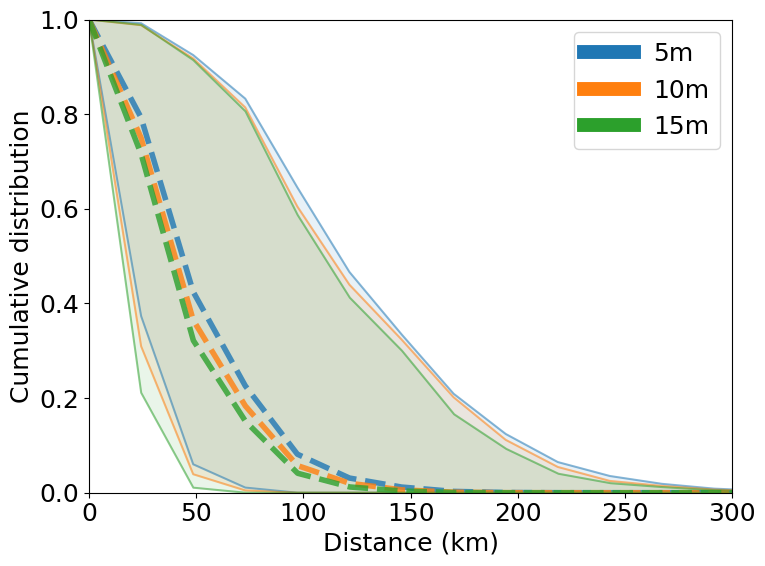

In [23]:
# List of datasets and colors for easier plotting
datasets = [dist_kernels_5, dist_kernels_10, dist_kernels_15]
labels = ['5m', '10m', '15m']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Adjust colors as needed 
linestyles = ['--', '--', '--'] 

plt.rcParams.update({
    'font.size': 18,       # Font size for text
    'font.family': 'sans-serif',  # Font family for consistency
    'axes.titlesize': 18,   # Font size for titles
    'axes.labelsize': 18,   # Font size for axis labels
    'xtick.labelsize': 18,  # Font size for tick labels
    'ytick.labelsize': 18   # Font size for tick labels
})

fig, ax = plt.subplots(figsize=(8, 6))

for dataset, label, color, linestyle in zip(datasets, labels, colors, linestyles):
    median_curve = dataset.groupby('dist')['obs_per_origin_area'].median()
    lower_bound = dataset.groupby('dist')['obs_per_origin_area'].quantile(0.025)
    upper_bound = dataset.groupby('dist')['obs_per_origin_area'].quantile(0.975)
    
    # Main median curve with unique linestyle
    ax.plot(
        median_curve.index, median_curve.values,
        color=color, linewidth=4, alpha=0.8, linestyle=linestyle, label=label
    )
    # Shaded 95% interval
    ax.fill_between(
        median_curve.index, lower_bound, upper_bound,
        color=color, alpha=0.1
    )
    # 95% interval bounds as solid lines
    ax.plot(
        lower_bound.index, lower_bound.values,
        color=color, linestyle='-', linewidth=1.5, alpha=0.5
    )
    ax.plot(
        upper_bound.index, upper_bound.values,
        color=color, linestyle='-', linewidth=1.5, alpha=0.5
    )

# Set axis limits
ax.set_xlim(0, 300)
ax.set_ylim(0, 1)

# Add labels and legend
ax.set_ylabel('Cumulative distribution', fontsize=18)
ax.set_xlabel('Distance (km)', fontsize=18)
legend_elements = [Line2D([0], [0], color=color, lw=10, label=label) for label, color in zip(labels, colors)]
ax.legend(handles=legend_elements, loc='best')

# Save the figure
plt.tight_layout()
#fig.savefig("plots/dispersal_kernels_95percent_07-28days.pdf", dpi=300, bbox_inches='tight')
plt.show()
